<a href="https://colab.research.google.com/github/Rabiya-k/K-means/blob/Hierarchical-clustering/K_means_mall_customers_using_Hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Mall Customers Segmentation.**

## **Problem Statement**
## Gucci (Italian luxury brand of fashion and leather goods) wants to set up a shop in the mall. You need to send push notification to the customer about this event. Find who will be the customers for the targeted marketing.

## **Initial Hypothesis :**

## Annual Income Vs Spending Score - Mostly five types of customer :

## Careful : High Income and Low Spending Score

## Standard : Average Income and Average Spending Score

## Target : High Income and High Spending Score

## Careless : Low Income and High Spending Score

## Sensible : Low Income and Low Spending Score

### **Import Required Libraries**

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### **Load te dataset**

In [166]:
#Reading dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')

In [167]:
#View dataset
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [168]:
#Basic details
data.shape

(200, 5)

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [170]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [171]:
#Checking missing values

data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [172]:
#Rename the column by Gender
data=data.rename(columns={'Genre':'Gender'})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Vizualisation**

In [173]:
from pylab import rcParams
rcParams['figure.figsize'] = 6,4

<ipython-input-174-2ebae4feb44b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Spending Score (1-100)'])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

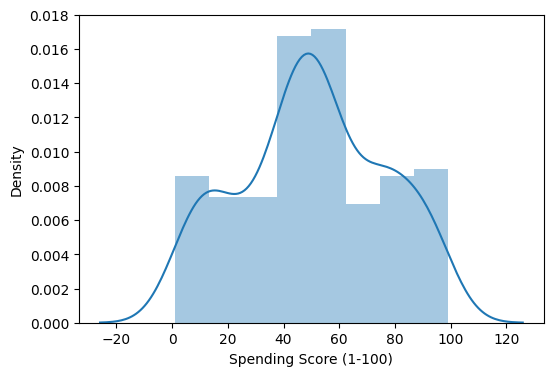

In [174]:
#Distribution plot
sns.distplot(data['Spending Score (1-100)'])


<Axes: >

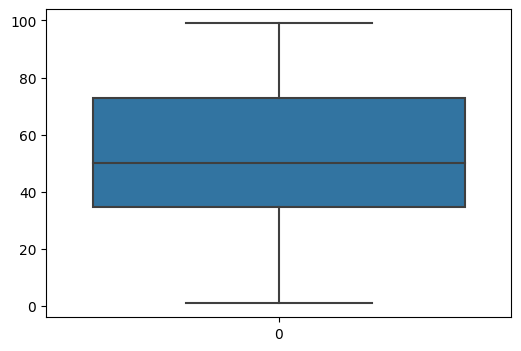

In [175]:
#Box plot
sns.boxplot(data['Spending Score (1-100)'])

We observe that the spending score is normally distributed from both the box plot and the distplot.

<ipython-input-176-3d5c427352d9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Annual Income (k$)'])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

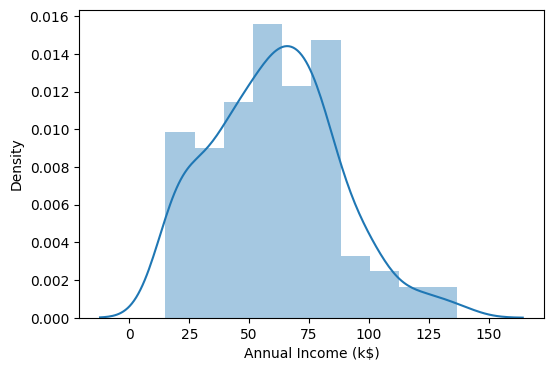

In [176]:
sns.distplot(data['Annual Income (k$)'])

<Axes: >

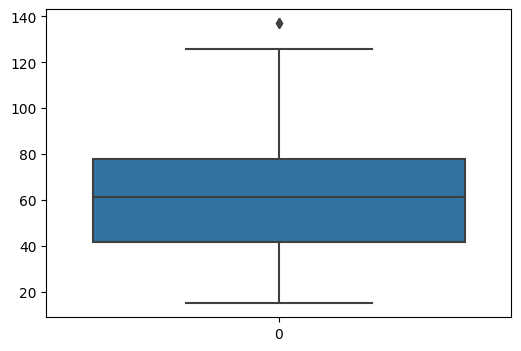

In [177]:
sns.boxplot(data['Annual Income (k$)'])

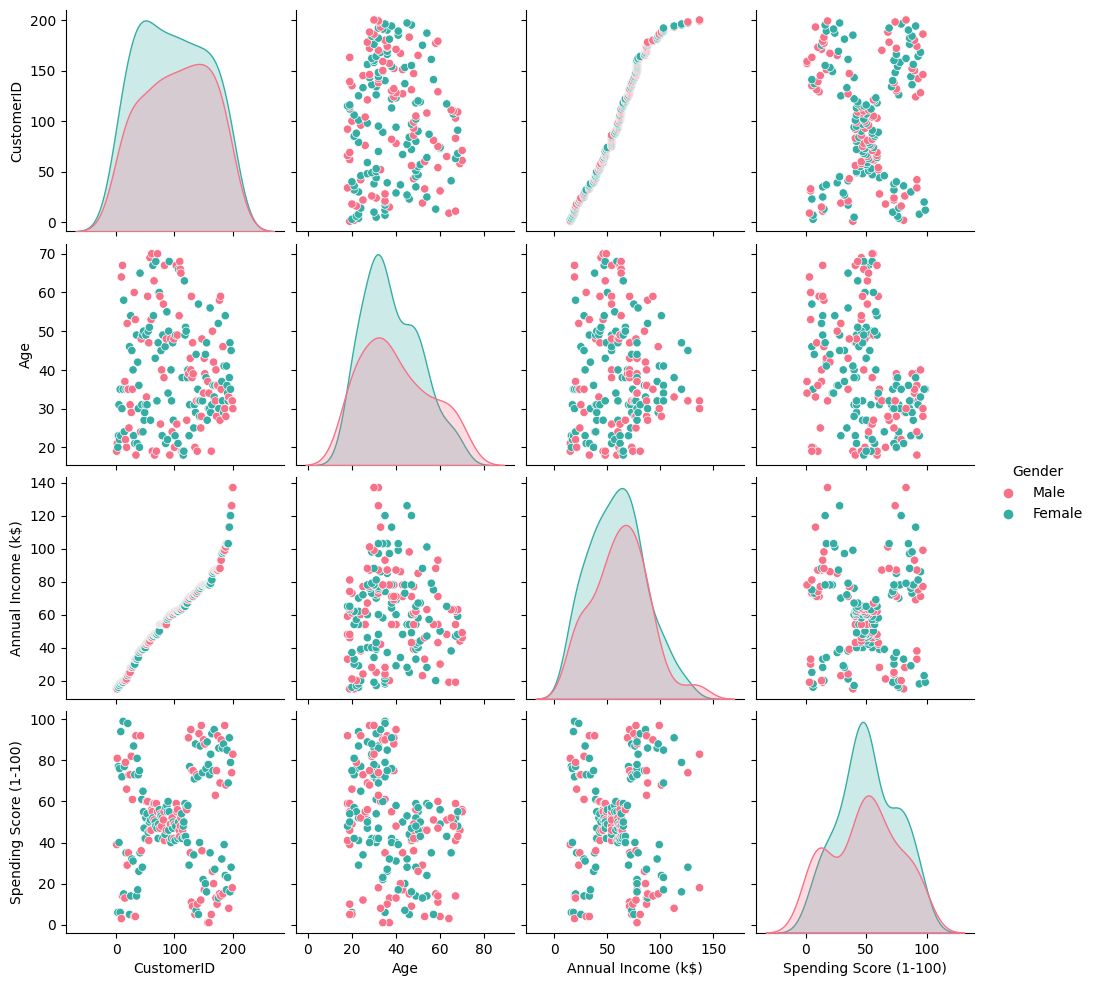

In [178]:
sns.pairplot(data, hue = 'Gender' , palette='husl')

<ipython-input-179-5308dfeb2773>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


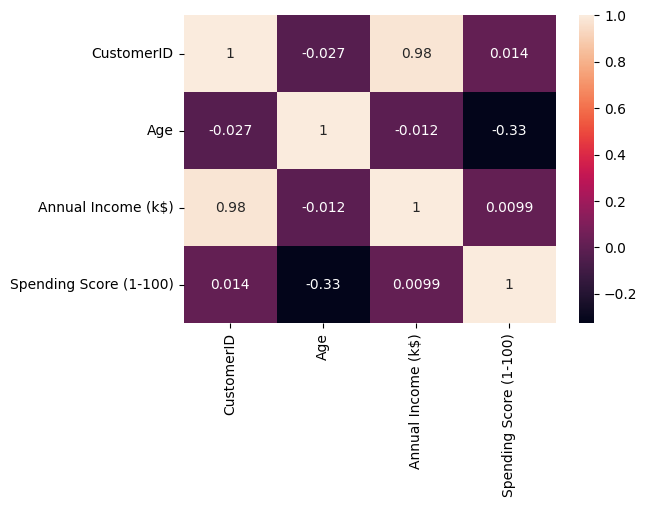

In [179]:
corr = data.corr()
ax = sns.heatmap(corr, annot = True)

From the heat map we observe that spending score is affected most by the age. Annual inome is not that correlated with the spending score.

In [180]:
X = data.iloc[:, 3:5].values ## Columns of interest

In [181]:
X[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]])

### **Find the Optimal number of clusters**

In [182]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

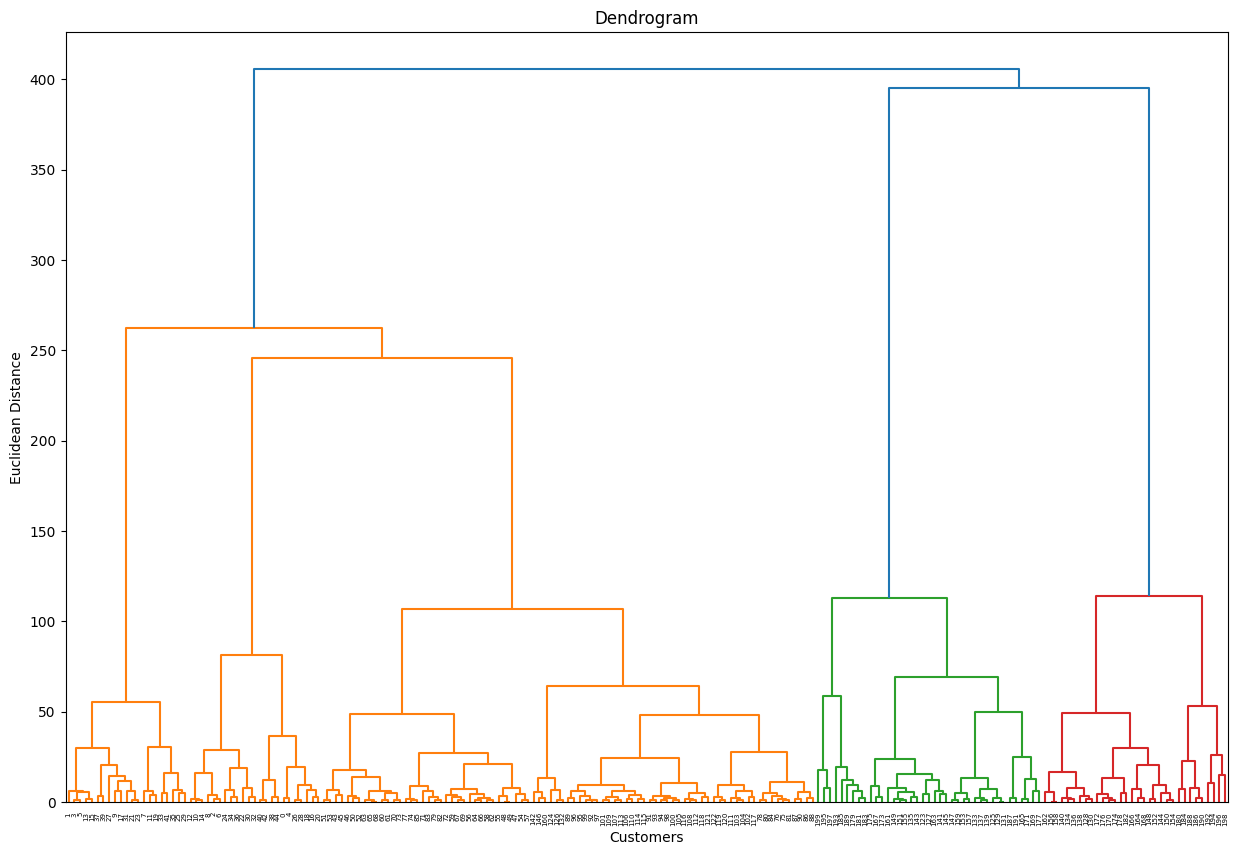

In [183]:
# Using the dendogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()   # find largest vertical distance we can make without crossing any other horizontal line

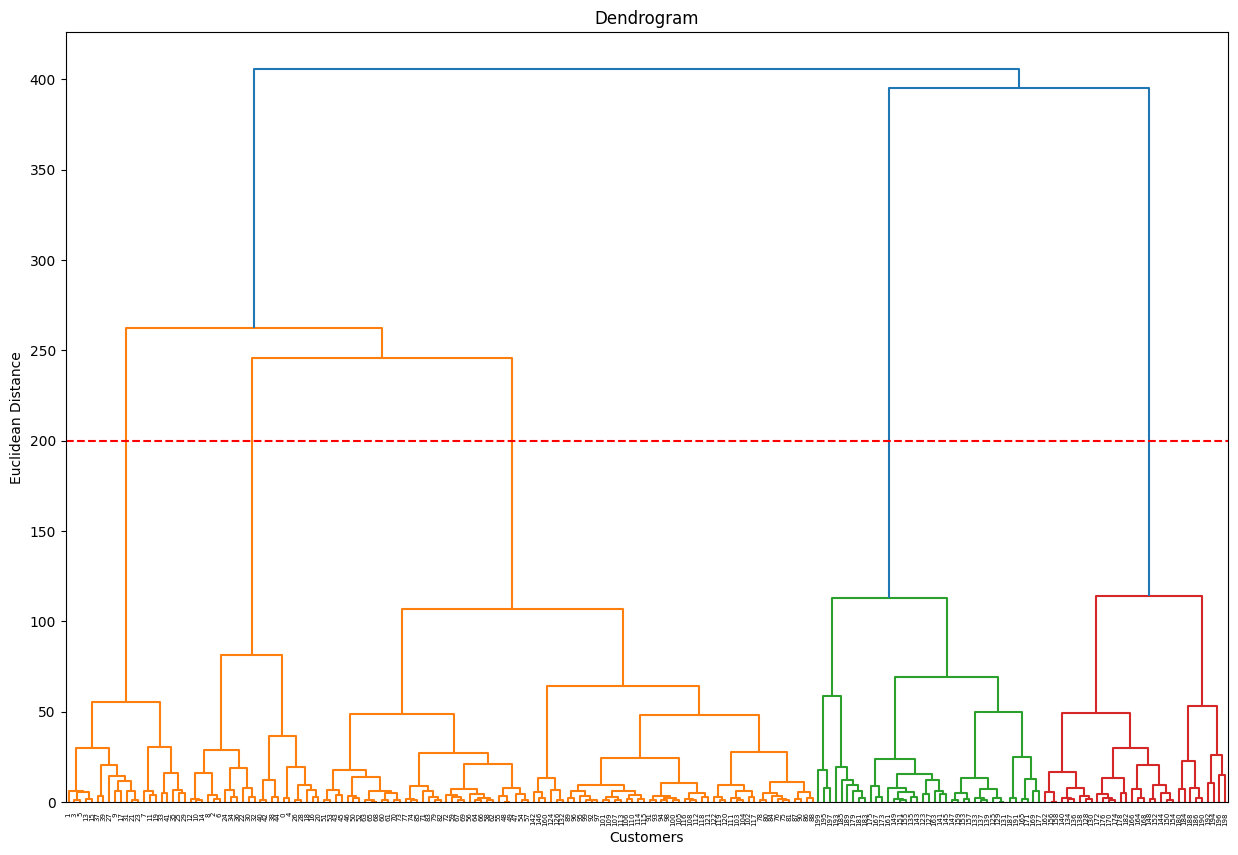

In [184]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=200, color = 'r' , linestyle ='--')
plt.show()

The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold.
No. of Cluster = 5

### **Training and Evaluation**

In [185]:
# Fitting hierarchical clustering to the mall dataset

from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters= 5, affinity = 'euclidean' ,linkage= 'ward')
y_hc = hc.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [186]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [187]:
#Build a new column in dataframe
data[['Clusters']] =pd.DataFrame(y_hc)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


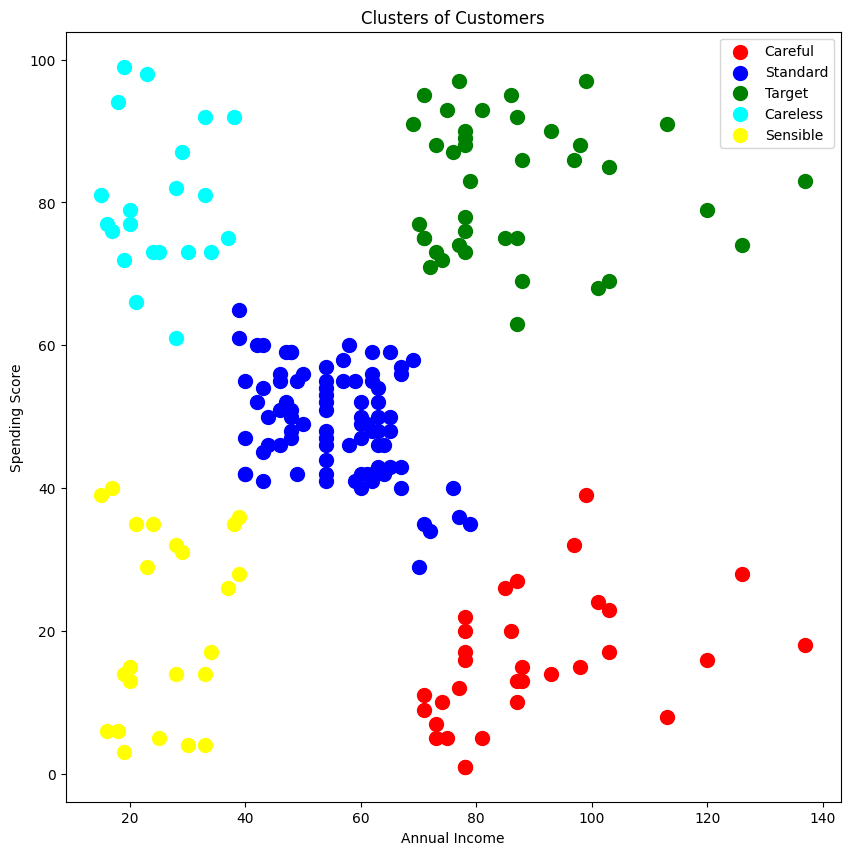

In [188]:
# Visualizing the clusters (two dimensions only)

rcParams['figure.figsize'] = 10, 10
plt.scatter(X[y_hc== 0,0], X[y_hc== 0,1], s=100, color='red', label='Careful')
plt.scatter(X[y_hc== 1,0], X[y_hc== 1,1], s=100, color='blue', label='Standard')
plt.scatter(X[y_hc== 2,0], X[y_hc== 2,1], s=100, color='green', label='Target')
plt.scatter(X[y_hc== 3,0], X[y_hc== 3,1], s=100, color='cyan', label='Careless')
plt.scatter(X[y_hc== 4,0], X[y_hc== 4,1], s=100, color='yellow', label='Sensible')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

we observe 5 clusters based on the customers annual income and their spending score. we can classify these clusters of customers as Careful, Standard, Target, Sensible and Careless people.

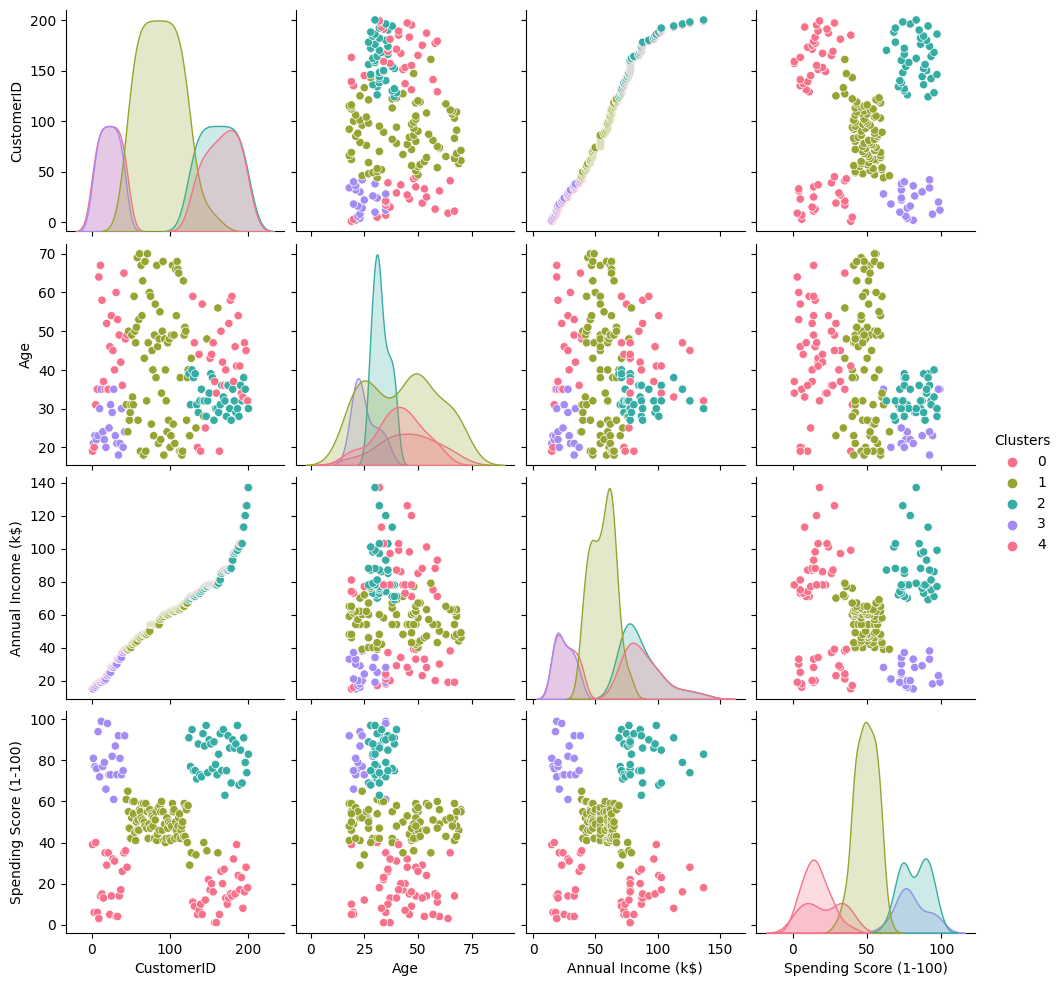

In [189]:
sns.pairplot(data, hue = 'Clusters' , palette='husl')

### **Prediction**

In [190]:
#Prediction of new datapoints
Labels = ['Standard', 'Careful', 'Sensible', 'Careless', 'Target']
cluster = hc.fit_predict([[33,56],[84,47],[62,35],[45,75],[75,96]])
print(cluster)
print(Labels[cluster[0]],Labels[cluster[1]],Labels[cluster[2]],Labels[cluster[3]],Labels[cluster[4]])

[4 3 1 2 0]
Target Careless Careful Sensible Standard


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
